In [ ]:
# Importing Dictionaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from prettytable import PrettyTable
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, LSTM, Embedding
import warnings
from google.colab import drive

%matplotlib inline

nltk.download('all')

warnings.filterwarnings('ignore')

drive.mount('/content/drive')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

Mounted at /content/drive


In [ ]:
# Getting the Dataset

df_1 = pd.read_csv("/content/drive/MyDrive/Covid-19 Twitter Dataset (Apr-Jun 2020).csv")
df_2 = pd.read_csv("/content/drive/MyDrive/Covid-19 Twitter Dataset (Apr-Jun 2021).csv")
df_3 = pd.read_csv("/content/drive/MyDrive/Covid-19 Twitter Dataset (Aug-Sep 2020).csv")

df = pd.concat([df_1 , df_2 , df_3])

df.head(5)

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
0,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",RT @GlblCtzn: .@priyankachopra is calling on l...,en,0.0,31.0,RJIshak,NaN,"GlblCtzn, priyankachopra",Jakarta Capital Region,call leader help protect refuge covid19 provid...,0.8176,0.0,0.452,0.548,pos
1,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...,en,0.0,61.0,makinwaoluwole,NaN,OGSG_Official,Nigeria,ogun state support cbn nirsal covid19 target c...,0.6486,0.0,0.602,0.398,pos
2,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" r...",RT @AdvoBarryRoux: These 5 police officials ba...,en,0.0,1.0,TembeAmu,NaN,AdvoBarryRoux,NaN,polic offici base namahadi polic station busi ...,0.2732,0.0,0.851,0.149,pos
3,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/iphone"" r...",RT @MobilePunch: COVID-19: Oyo discharges two ...,en,0.0,0.0,ilyasrabiu,NaN,MobilePunch,"Lagos, Nigeria",covid19 oyo discharg two patient,0.0000,0.0,1.000,0.000,neu
4,1.250000e+18,2020-04-19,"<a href=""http://twitter.com/download/android"" ...",My Condolences to the Family of those who did ...,en,0.0,13869.0,bucketeconomist,Covid_19,NaN,NaN,condol famili surviv,0.0000,0.0,1.000,0.000,neu


In [ ]:
# Basic EDA of Dataset

def general_info(df):
    print("The number of rows in the dataset is" , df.shape[0] , "and the number of columns is" , df.shape[1])
    print("_"*100)
    print("The columns are" , df.columns)
    print("_"*100)
    print("The General Information about the Dataset is")
    print(df.info())
    print("_"*100)
    num = [x for x in df.columns if df[x].dtype != "object"]
    cat = [x for x in df.columns if df[x].dtype == "object"]
    print("The numeric columns are" , num)
    print("_"*100)
    print("The categorical columns are" , cat)
    print("_"*100)
    print("The null values are")
    print(df.isnull().sum())
    print("_"*100)
    print("The number of Duplicate Values are" , df.duplicated().sum())

general_info(df)


The number of rows in the dataset is 411887 and the number of columns is 17
____________________________________________________________________________________________________
The columns are Index(['id', 'created_at', 'source', 'original_text', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'hashtags', 'user_mentions',
       'place', 'clean_tweet', 'compound', 'neg', 'neu', 'pos', 'sentiment'],
      dtype='object')
____________________________________________________________________________________________________
The General Information about the Dataset is
<class 'pandas.core.frame.DataFrame'>
Index: 411887 entries, 0 to 120508
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               411883 non-null  float64
 1   created_at       411885 non-null  object 
 2   source           411587 non-null  object 
 3   original_text    411885 non-null  object 
 4   lang            

In [ ]:
df.describe()

,id,favorite_count,retweet_count,compound,neg,neu,pos
count,4.118830e+05,411884.000000,411884.000000,411887.000000,411887.000000,411887.000000,411887.000000
mean,1.324197e+18,0.216726,1585.174163,0.008415,0.090920,0.807021,0.102052
std,5.902218e+16,6.332250,9423.896052,0.370853,0.152717,0.200474,0.157080
min,1.250000e+18,0.000000,0.000000,-0.992500,0.000000,0.000000,0.000000
25%,1.260000e+18,0.000000,1.000000,-0.102700,0.000000,0.667000,0.000000
50%,1.310000e+18,0.000000,15.000000,0.000000,0.000000,0.819000,0.000000
75%,1.395011e+18,0.000000,243.000000,0.226300,0.180000,1.000000,0.200000
max,1.409140e+18,2923.000000,416923.000000,0.980500,1.000000,1.000000,1.000000


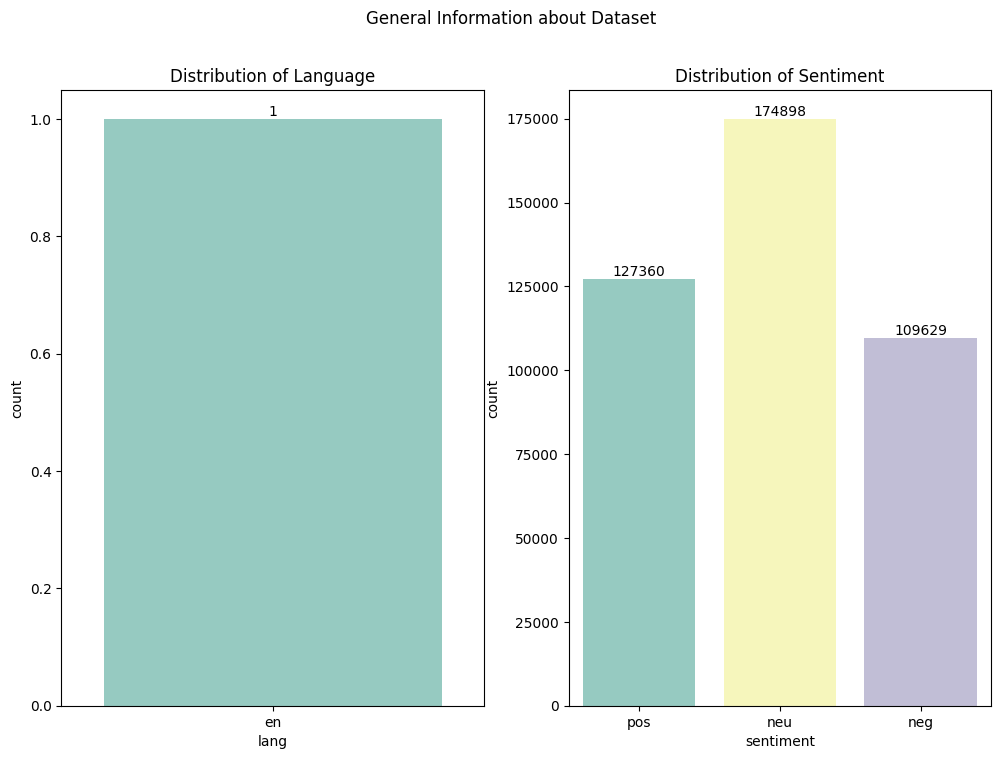

In [ ]:

df_unique = df.drop_duplicates(subset=['lang'])

plt.figure(figsize = (12,8))
plt.subplot(1 , 2, 1)
ax = sns.countplot(data = df_unique, x = "lang" , palette = "Set3")
for x in ax.containers:
    ax.bar_label(x)
plt.title("Distribution of Language")
plt.subplot(1 , 2, 2)
ax = sns.countplot(data = df, x = "sentiment" , palette = "Set3")
for x in ax.containers:
    ax.bar_label(x)
plt.title("Distribution of Sentiment")
plt.suptitle("General Information about Dataset")
plt.show()

In [ ]:
# Creating Final Dataframe
df = df[["original_text" , "sentiment"]]
df.head(10)

,original_text,sentiment
0,RT @GlblCtzn: .@priyankachopra is calling on l...,pos
1,RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...,pos
2,RT @AdvoBarryRoux: These 5 police officials ba...,pos
3,RT @MobilePunch: COVID-19: Oyo discharges two ...,neu
4,My Condolences to the Family of those who did ...,neu
5,RT @DrJMZimmerman: I received this text from m...,neu
6,Taiwan's Vice-President Chen Chien-jen on his ...,neg
7,RT @morethanmySLE: BREAKING: A New York woman ...,neg
8,Horrible tragedy in Nova Scotia today. How wil...,neu
9,@TahirsyeedK @sagarikaghose Covid-19 can be cu...,neu


In [ ]:
# Pre-processing

df.dropna(inplace = True)

def remove_username(text):
    return re.sub(r"@\w+", "", text)

def lower(text):
    return text.lower()

def remove_punkt(text):
    return re.sub(r"[^\w\s'#]", '', text)

def remove_url(content):
    return re.sub(r'http\S+', '', content)

def expand_short_forms(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)
    return content

def remove_stopwords(text):
    stop = stopwords.words("english")
    stop.extend(["would", "shall", "could", "might" , "rt"])
    if "not" in stop:
        stop.remove("not")
    clean_text = ' '.join([x for x in text.split() if x.lower() not in stop])
    return clean_text

def final_clean(text):
    text = remove_username(text)
    text = lower(text)
    text = remove_punkt(text)
    text = expand_short_forms(text)
    text = remove_stopwords(text)
    text = remove_url(text)
    return text

df["cleaned"] = df["original_text"].apply(final_clean)

df.head(10)

,original_text,sentiment,cleaned
0,RT @GlblCtzn: .@priyankachopra is calling on l...,pos,calling leaders help protect refugees covid19 ...
1,RT @OGSG_Official: OGUN STATE SUPPORT FOR CBN-...,pos,ogun state support cbnnirsal covid19 targeted ...
2,RT @AdvoBarryRoux: These 5 police officials ba...,pos,5 police officials based namahadi police stati...
3,RT @MobilePunch: COVID-19: Oyo discharges two ...,neu,covid19 oyo discharges two patients
4,My Condolences to the Family of those who did ...,neu,condolences family not survive #covid_19
5,RT @DrJMZimmerman: I received this text from m...,neu,received text 19 year old son working covid pa...
6,Taiwan's Vice-President Chen Chien-jen on his ...,neg,taiwan vicepresident chen chienjen country fig...
7,RT @morethanmySLE: BREAKING: A New York woman ...,neg,breaking new york woman #coronavirus symptoms ...
8,Horrible tragedy in Nova Scotia today. How wil...,neu,horrible tragedy nova scotia today families ge...
9,@TahirsyeedK @sagarikaghose Covid-19 can be cu...,neu,covid19 cured sooner laterbut cure ghose virus


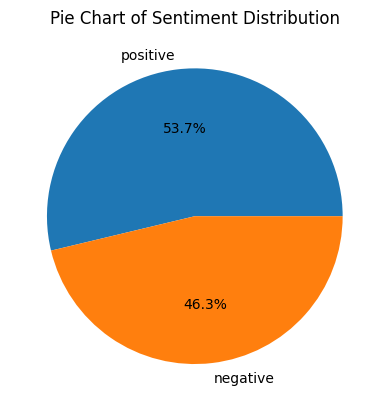

In [ ]:
# Final Dataset

df = df[df['sentiment'].isin(['pos', 'neg'])]

plt.figure()
plt.pie(df["sentiment"].value_counts() , autopct='%1.1f%%' , labels = ["positive" , "negative"])
plt.title("Pie Chart of Sentiment Distribution")
plt.show()

df.drop("original_text" , axis = 1 , inplace = True)


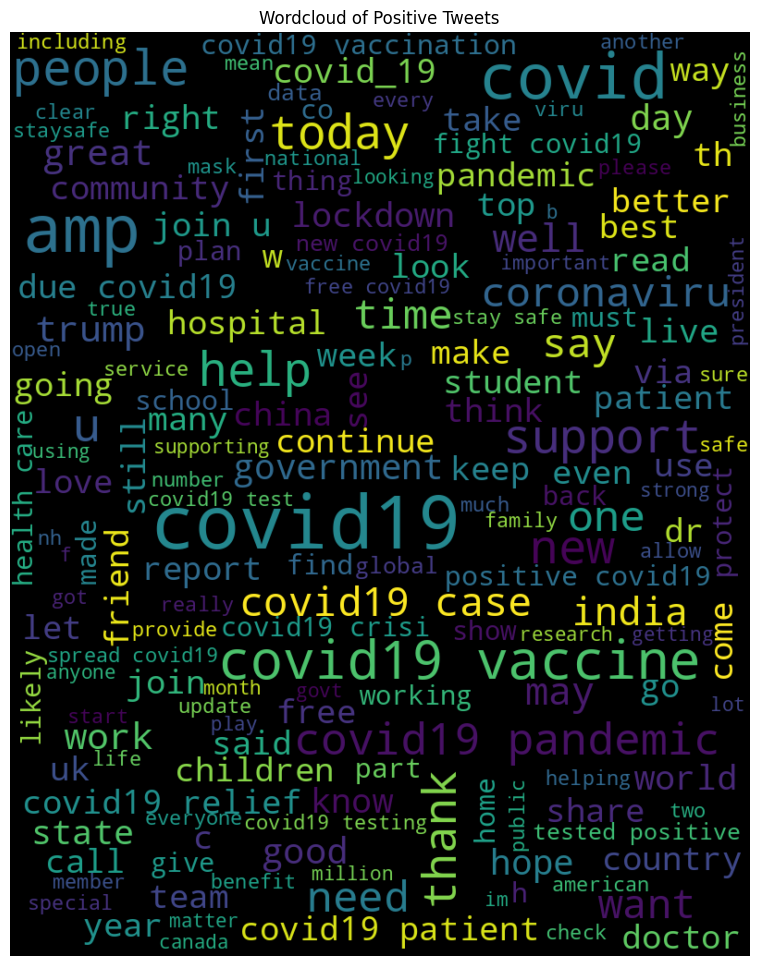

In [ ]:
# WordCloud Analysis

pos = " ".join(df[df["sentiment"] == "pos"]["cleaned"])

wc_pos = WordCloud(height = 1000 , width = 800 , background_color = "black" , min_font_size = 20 , max_font_size = 80).generate(pos)

plt.figure(figsize = (12,12))
plt.imshow(wc_pos , interpolation = "bilinear")
plt.title("Wordcloud of Positive Tweets")
plt.axis("off")
plt.show()

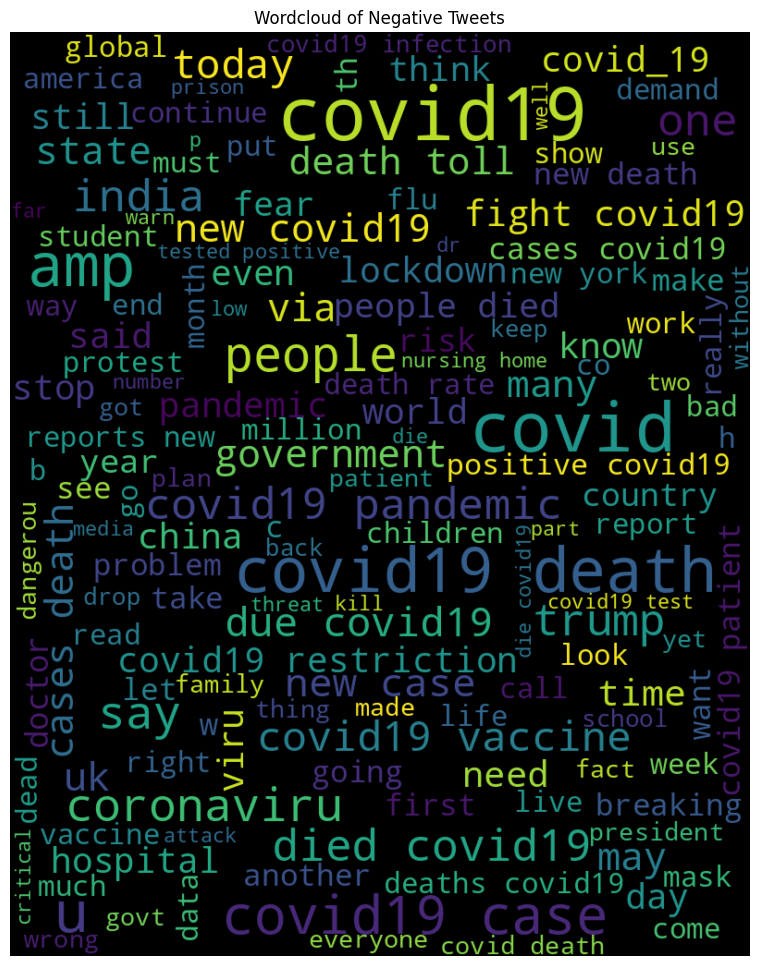

In [ ]:
neg = " ".join(df[df["sentiment"] == "neg"]["cleaned"])

wc_neg = WordCloud(height = 1000 , width = 800 , background_color = "black" , min_font_size = 20 , max_font_size = 80).generate(neg)

plt.figure(figsize = (12,12))
plt.imshow(wc_neg , interpolation = "bilinear")
plt.title("Wordcloud of Negative Tweets")
plt.axis("off")
plt.show()

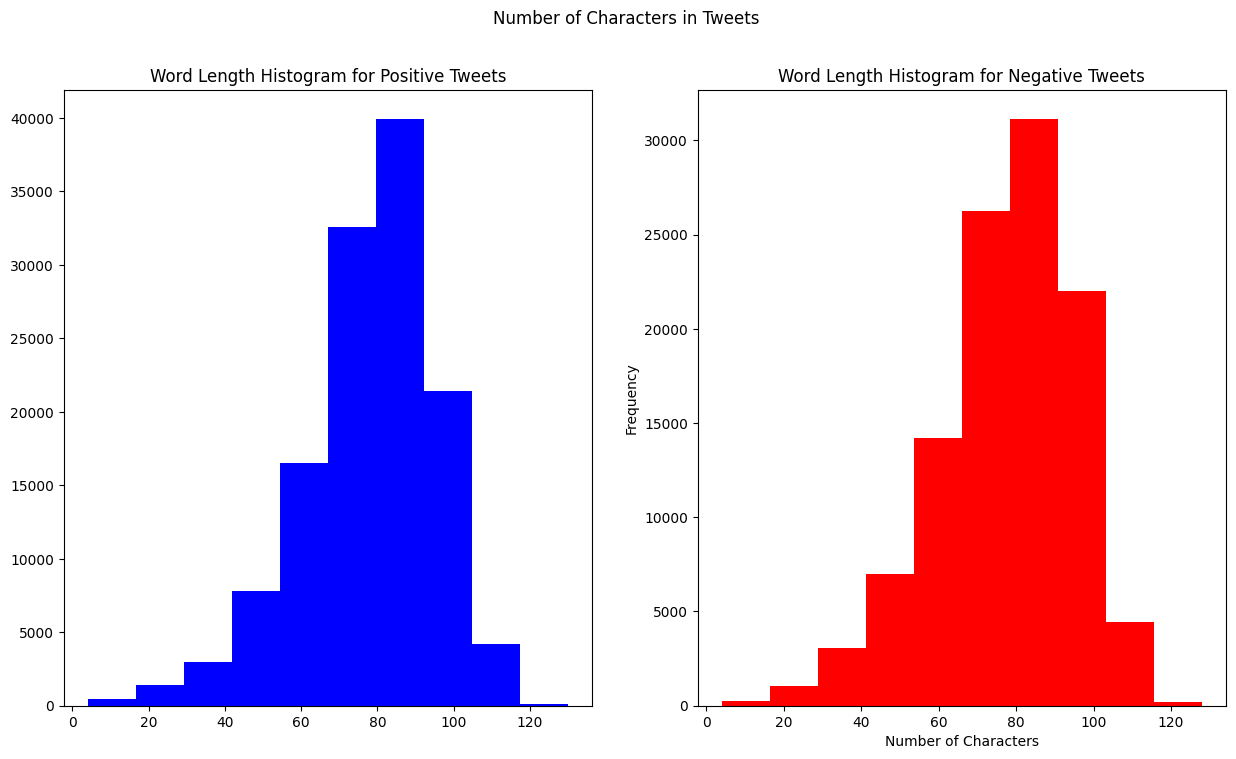

In [ ]:
# Tweet Length Analysis

figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
len_pos=df[df['sentiment'] == "pos"]['cleaned'].str.len()
pos_ax.hist(len_pos ,color='blue')
pos_ax.set_title('Word Length Histogram for Positive Tweets')
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
len_neg = df[df["sentiment"] == "neg"]['cleaned'].str.len()
neg_ax.hist(len_neg,color='red')
neg_ax.set_title('Word Length Histogram for Negative Tweets')
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
figure.suptitle('Number of Characters in Tweets')
plt.show()

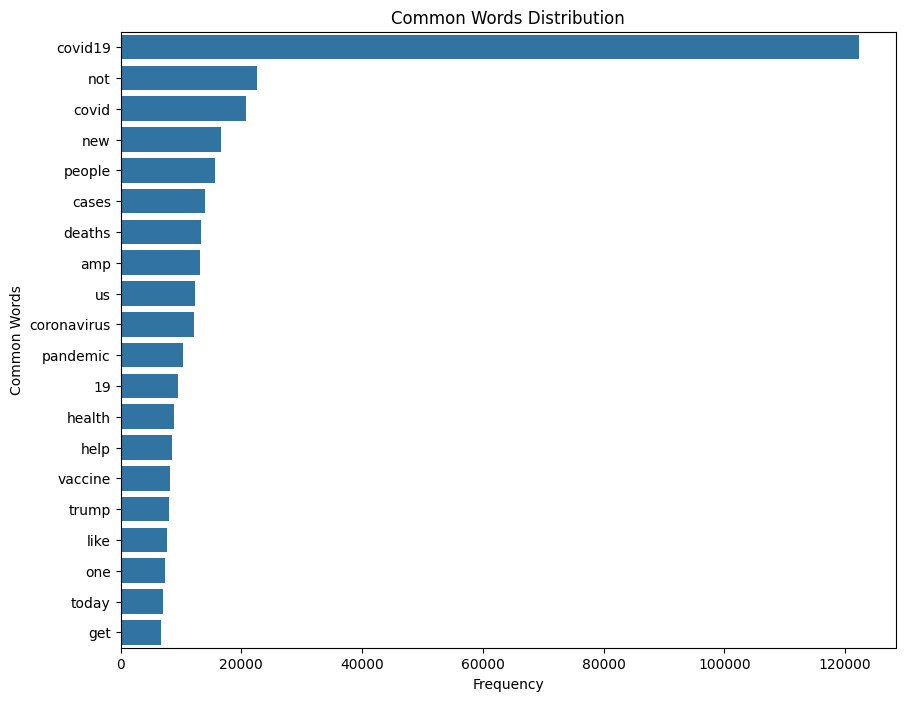

In [ ]:
# Word Frequency Analysis

def common_words(text, n):

    if isinstance(text, str):
        text = [text]

    vec = CountVectorizer(ngram_range=(n, n)).fit(text)
    bow = vec.transform(text)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)


    df_words = pd.DataFrame(words_freq[:20], columns=["Common_Words", "Frequency"])

    return df_words


vocab = df["cleaned"].tolist()
df_toplot = common_words(vocab, 1)


plt.figure(figsize=(10, 8))
sns.barplot(data=df_toplot, y="Common_Words", x="Frequency")
plt.title("Common Words Distribution")
plt.xlabel("Frequency")
plt.ylabel("Common Words")
plt.show()


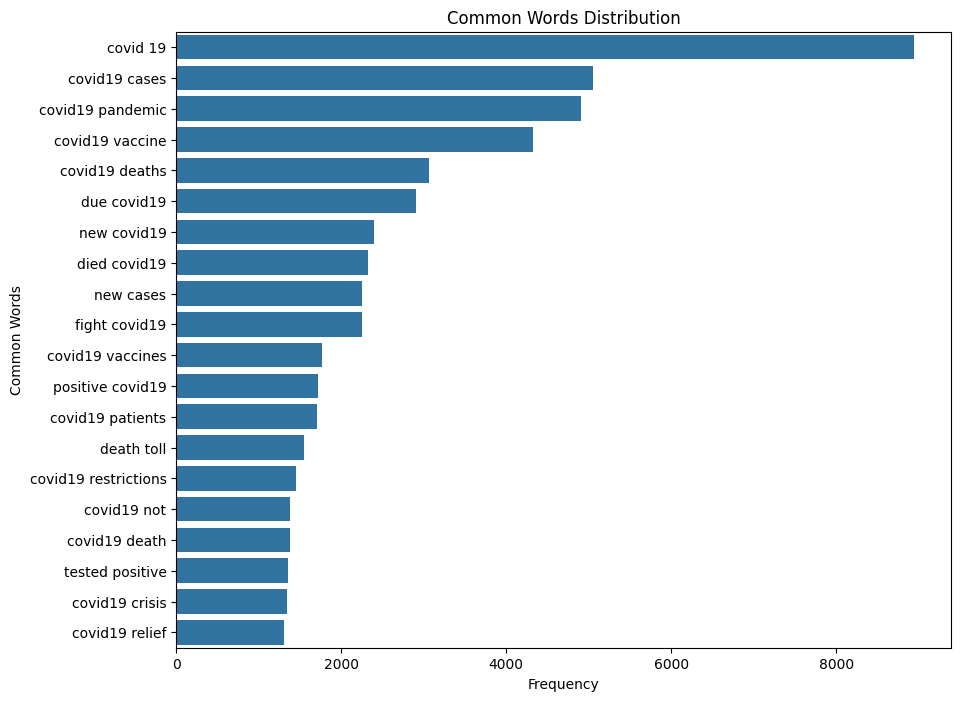

In [ ]:
df_toplot = common_words(vocab, 2)


plt.figure(figsize=(10, 8))
sns.barplot(data=df_toplot, y="Common_Words", x="Frequency")
plt.title("Common Words Distribution")
plt.xlabel("Frequency")
plt.ylabel("Common Words")
plt.show()


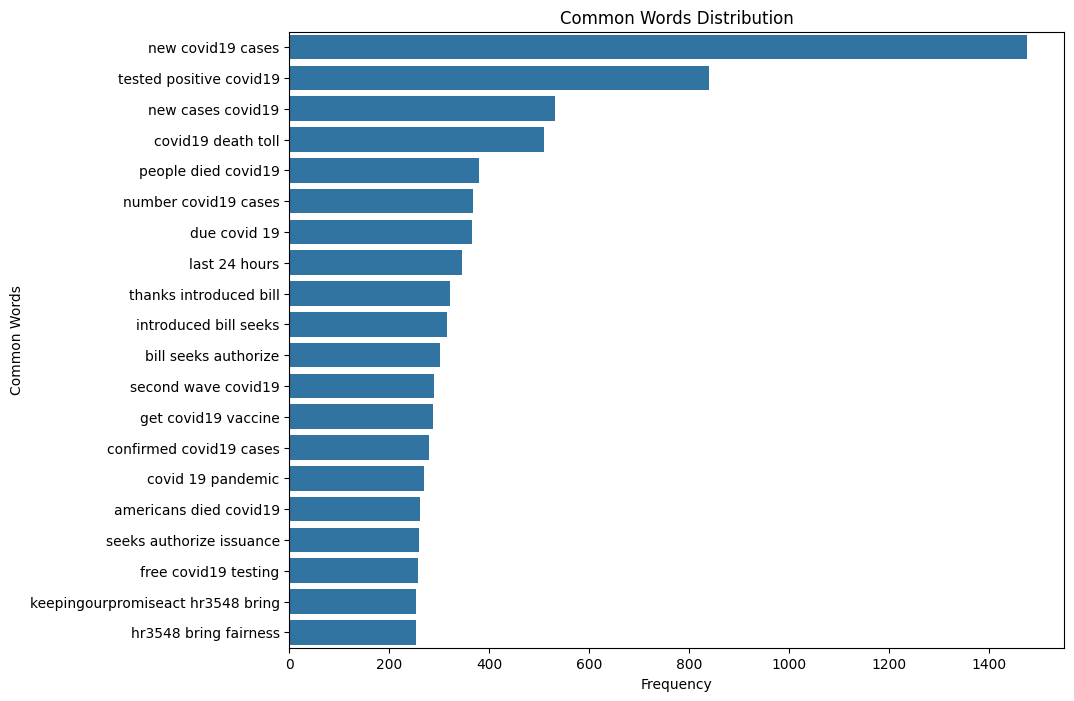

In [ ]:
df_toplot = common_words(vocab, 3)


plt.figure(figsize=(10, 8))
sns.barplot(data=df_toplot, y="Common_Words", x="Frequency")
plt.title("Common Words Distribution")
plt.xlabel("Frequency")
plt.ylabel("Common Words")
plt.show()

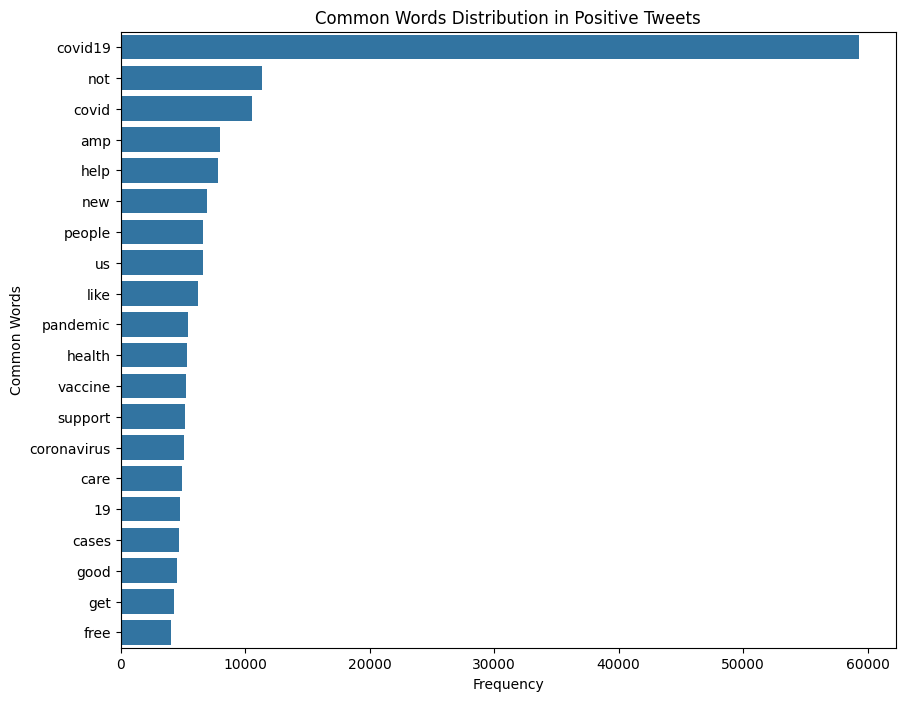

In [ ]:
df_toplot = common_words(pos, 1)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_toplot, y="Common_Words", x="Frequency")
plt.title("Common Words Distribution in Positive Tweets")
plt.xlabel("Frequency")
plt.ylabel("Common Words")
plt.show()

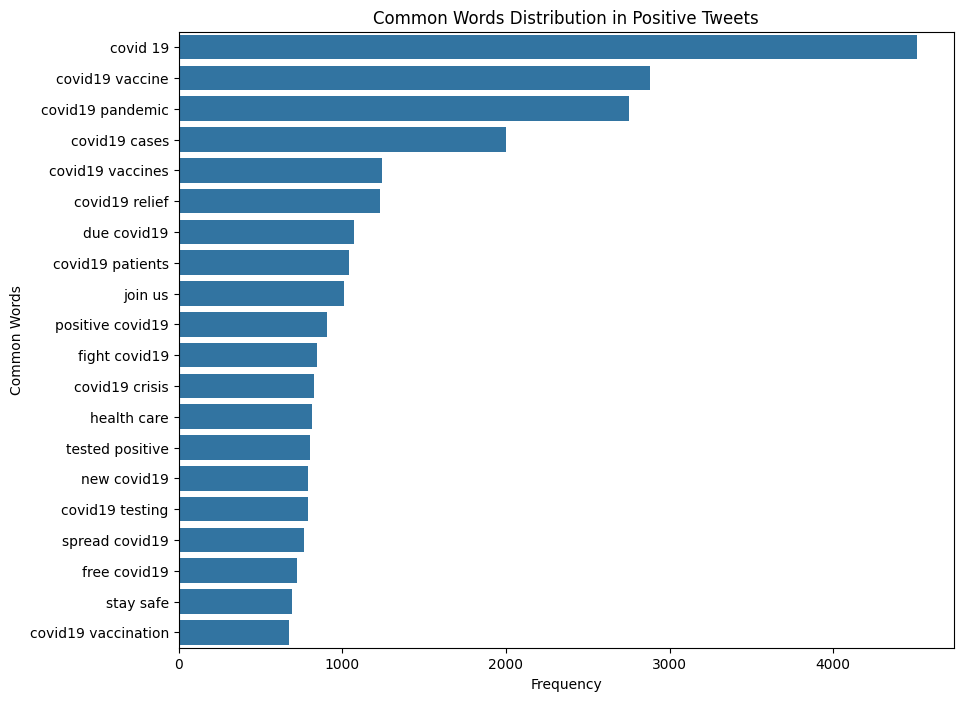

In [ ]:
df_toplot = common_words(pos, 2)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_toplot, y="Common_Words", x="Frequency")
plt.title("Common Words Distribution in Positive Tweets")
plt.xlabel("Frequency")
plt.ylabel("Common Words")
plt.show()

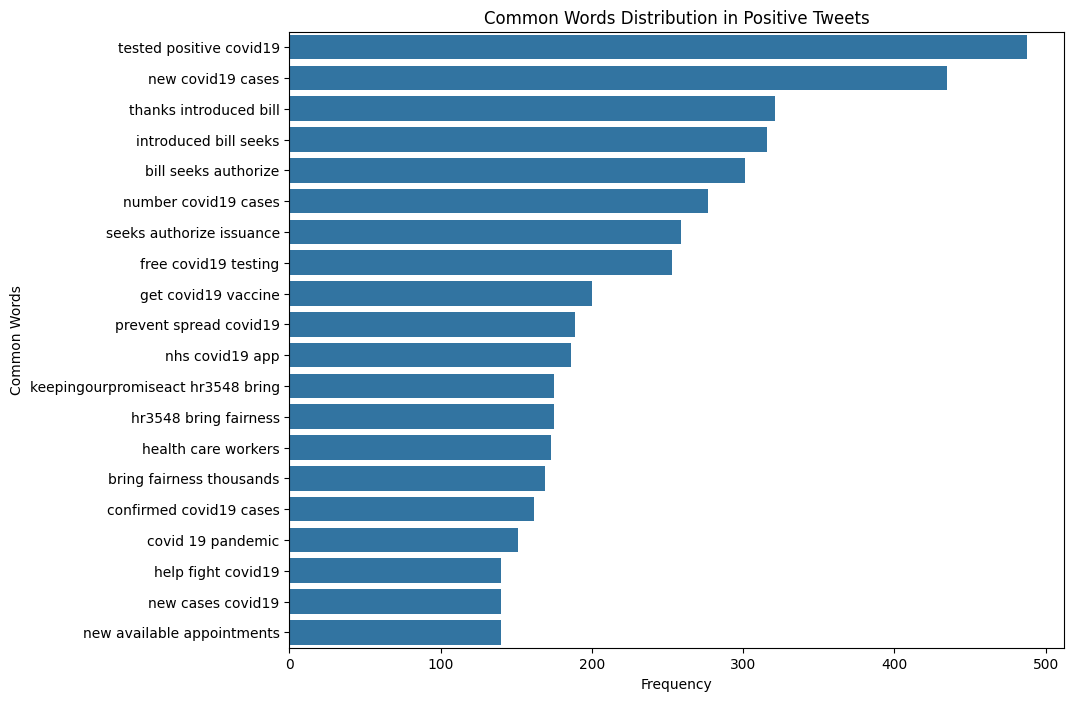

In [ ]:
df_toplot = common_words(pos, 3)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_toplot, y="Common_Words", x="Frequency")
plt.title("Common Words Distribution in Positive Tweets")
plt.xlabel("Frequency")
plt.ylabel("Common Words")
plt.show()

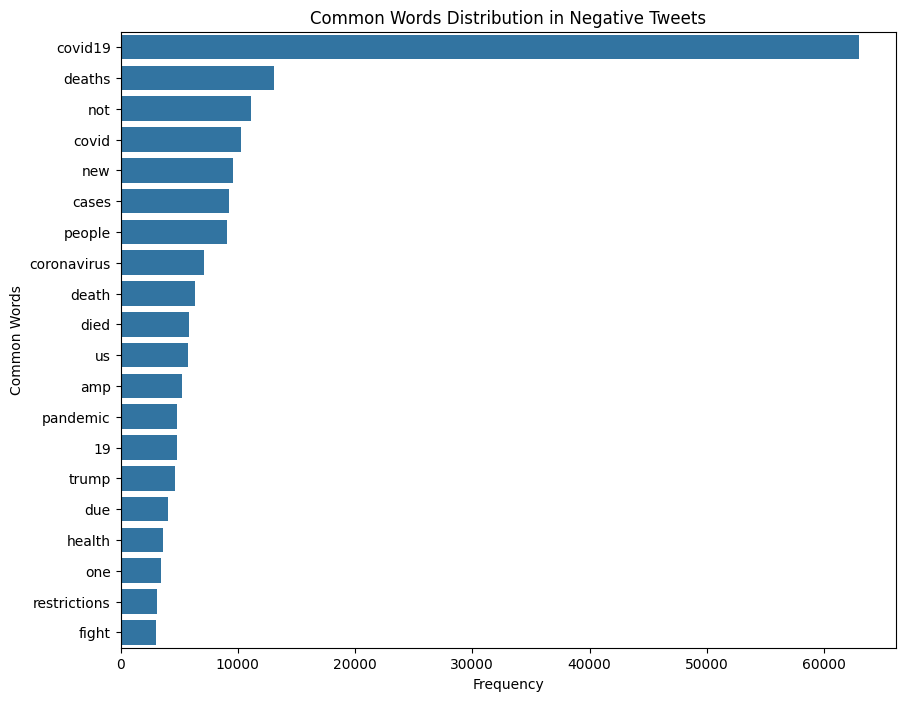

In [ ]:
df_toplot = common_words(neg, 1)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_toplot, y="Common_Words", x="Frequency")
plt.title("Common Words Distribution in Negative Tweets")
plt.xlabel("Frequency")
plt.ylabel("Common Words")
plt.show()

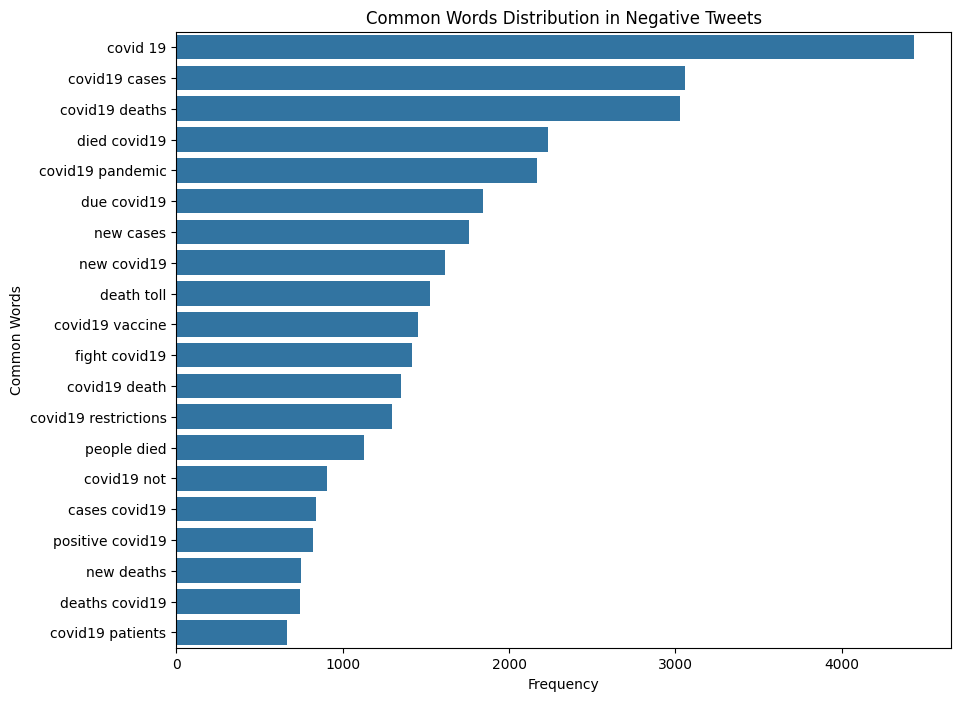

In [ ]:
df_toplot = common_words(neg, 2)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_toplot, y="Common_Words", x="Frequency")
plt.title("Common Words Distribution in Negative Tweets")
plt.xlabel("Frequency")
plt.ylabel("Common Words")
plt.show()

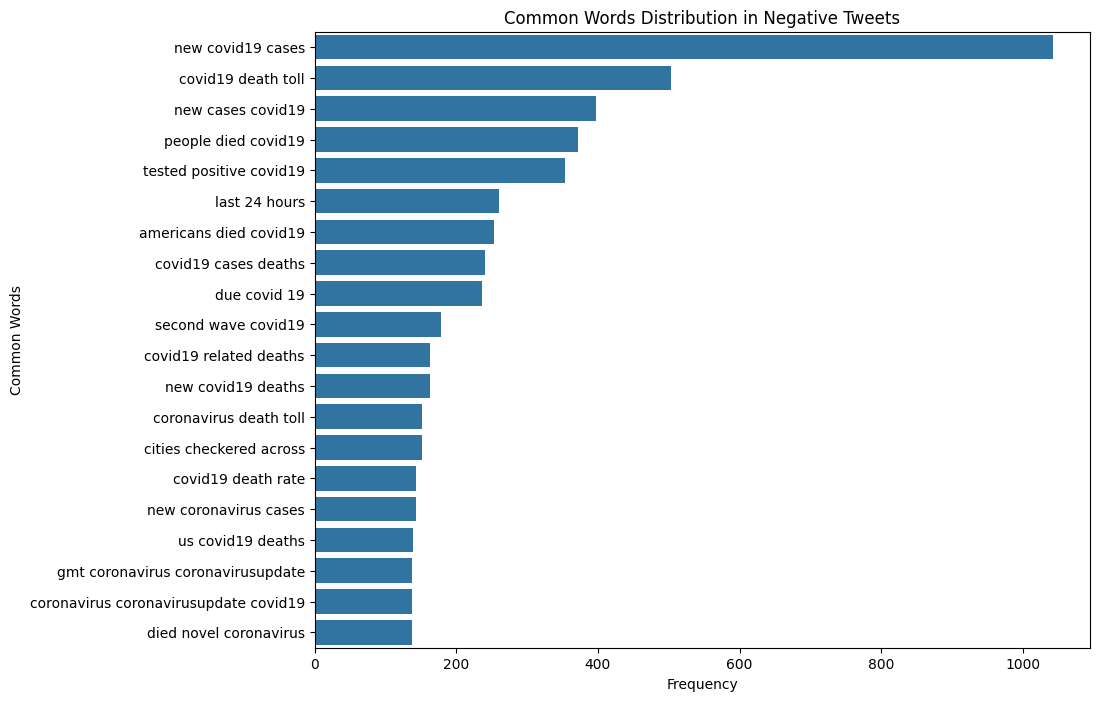

In [ ]:
df_toplot = common_words(neg, 3)

plt.figure(figsize=(10, 8))
sns.barplot(data=df_toplot, y="Common_Words", x="Frequency")
plt.title("Common Words Distribution in Negative Tweets")
plt.xlabel("Frequency")
plt.ylabel("Common Words")
plt.show()

In [ ]:
# Hashtag Analysis

def tag(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"# (\w+)", tweet)
        hashtags.append(ht)
    return hashtags

ht_pos = tag(df['cleaned'][df['sentiment'] == "pos"])
ht_neg = tag(df['cleaned'][df['sentiment'] == "neg"])

ht_pos = sum(ht_pos, [])
ht_neg = sum(ht_neg, [])

fre_pos = nltk.FreqDist(ht_pos)
fre_neg = nltk.FreqDist(ht_neg)

df_fre_pos = pd.DataFrame({"Hashtag" : fre_pos.keys() , "Frequency" : fre_pos.values()}).nlargest(n = 15 , columns = "Frequency")
df_fre_neg = pd.DataFrame({"Hashtag" : fre_neg.keys() , "Frequency" : fre_neg.values()}).nlargest(n = 15 , columns = "Frequency")

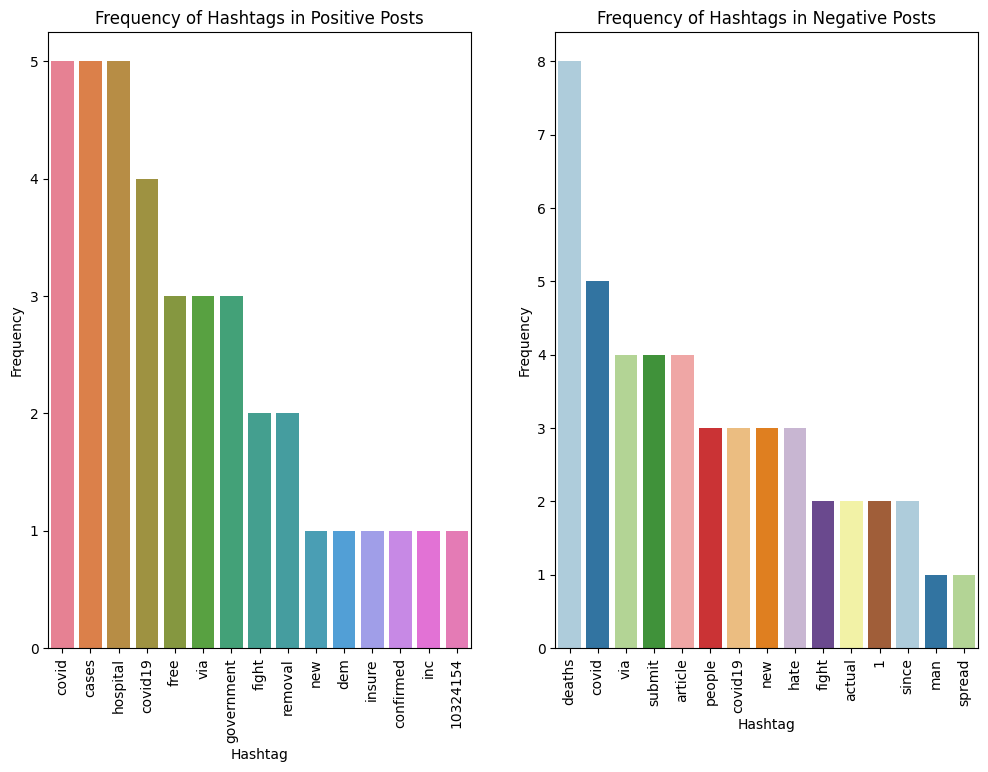

In [ ]:
plt.figure(figsize = (12,8))
plt.subplot(1 , 2, 1)
sns.barplot(df_fre_pos , x = "Hashtag" , y = "Frequency" , palette = "husl")
plt.title("Frequency of Hashtags in Positive Posts")
plt.xticks(rotation = 90)
plt.subplot(1 , 2 , 2)
sns.barplot(df_fre_neg , x = "Hashtag" , y = "Frequency" , palette = "Paired")
plt.title("Frequency of Hashtags in Negative Posts")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Training and Testing Split and Word Importance

class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self , tweet):
       return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(tweet)]

df["sentiment"] = df["sentiment"].replace({"pos" : 1 , "neg" : 0})

X = df["cleaned"]
y = df["sentiment"]

xtrain , xtest , ytrain , ytest = train_test_split(X , y , random_state = 42 , test_size = 0.2)

tfidf = TfidfVectorizer(analyzer = 'word' , ngram_range = (1,1) , max_features = 500 , min_df = 10 , tokenizer = LemmaTokenizer())

xtrain = tfidf.fit_transform(xtrain)
xtest = tfidf.fit_transform(xtest)

lr = LogisticRegression()

lr.fit(xtrain , ytrain)

tab = PrettyTable(["Word" , "Importance"])

i = 0
for x , y in zip(tfidf.get_feature_names_out() , lr.coef_[0]):
    if i <=500:
        tab.add_row([x , y])
    i += 1

# Analysing Performance of Logistic Regression Model

pred = lr.predict(xtest)
print("The Precision Score is " , precision_score(pred , ytest ,average = 'micro'))
print("The Accuracy Score is " , accuracy_score(pred , ytest))
print("The F1 Score is " , f1_score(pred , ytest , average = 'weighted'))
print(tab)

The Precision Score is  0.5801299632895903
The Accuracy Score is  0.5801299632895903
The F1 Score is  0.5803110193687797
+----------------+------------------------+
|      Word      |       Importance       |
+----------------+------------------------+
|       #        |   0.4571653752648009   |
|       '        |  -0.34085791071961724  |
|       1        |   0.4071008884443265   |
|       10       |   0.5077477909858579   |
|      100       |  0.014798684886694474  |
|       12       |  0.38510413192468157   |
|       15       |  0.42461409991080834   |
|       19       |  -0.09253442094026038  |
|       2        |  -0.06456962997744801  |
|       20       |   0.3643185310882843   |
|      2020      |   0.3472127511510579   |
|      2021      |  0.16475977051982496   |
|       24       |   -0.931930418757173   |
|       3        |  -0.1463230364634455   |
|       30       |   0.5588326952546464   |
|       4        |  0.005497686299920331  |
|       5        |  0.26326347657724464   |

In [ ]:
# Creating an ANN

model = Sequential()
model.add(Dense(128 , activation = "relu" , input_shape = (xtrain.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64 , activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(32 , activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(8 , activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1 , activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               64128     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 2

In [ ]:
# Training the ANN
xtrain = xtrain.toarray()
xtest = xtest.toarray()

model.compile("adam" , loss = "binary_crossentropy" , metrics = ["accuracy"])

hist = model.fit(xtrain , ytrain , epochs = 5 , validation_data = (xtest,ytest) , batch_size = 32)

Epoch 1/5
5925/5925 [==============================] - 34s 5ms/step - loss: 0.4590 - accuracy: 0.7689 - val_loss: 0.9947 - val_accuracy: 0.5791
Epoch 2/5
5925/5925 [==============================] - 29s 5ms/step - loss: 0.4162 - accuracy: 0.7976 - val_loss: 1.0931 - val_accuracy: 0.5746
Epoch 3/5
5925/5925 [==============================] - 31s 5ms/step - loss: 0.4082 - accuracy: 0.8027 - val_loss: 1.1380 - val_accuracy: 0.5779
Epoch 4/5
5925/5925 [==============================] - 30s 5ms/step - loss: 0.4018 - accuracy: 0.8061 - val_loss: 1.1114 - val_accuracy: 0.5746
Epoch 5/5
5925/5925 [==============================] - 31s 5ms/step - loss: 0.3980 - accuracy: 0.8081 - val_loss: 1.1751 - val_accuracy: 0.5817


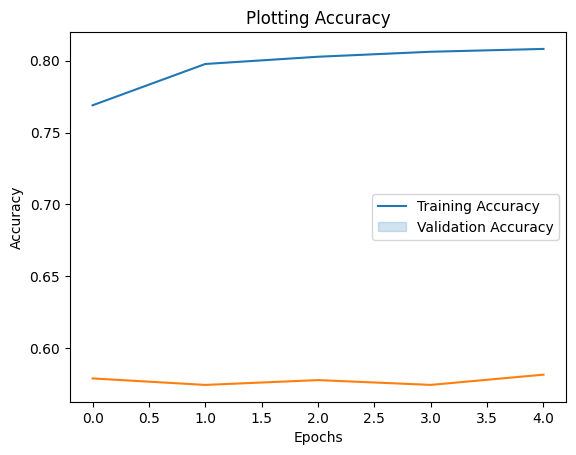

In [ ]:
#Evaluating the ANN

plt.figure()
sns.lineplot(hist.history["accuracy"])
sns.lineplot(hist.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Plotting Accuracy")
plt.legend(["Training Accuracy" , "Validation Accuracy"])
plt.show()

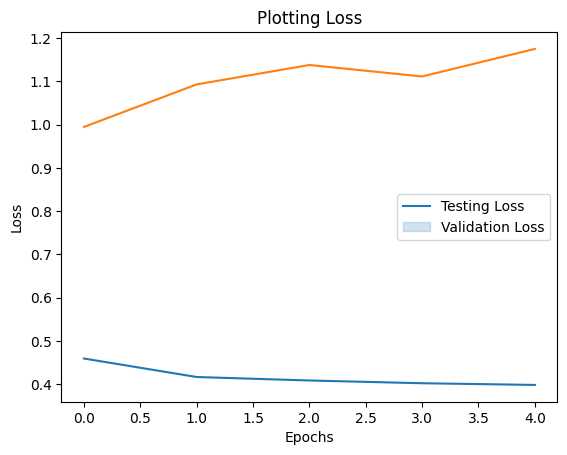

In [ ]:
plt.figure()
sns.lineplot(hist.history["loss"])
sns.lineplot(hist.history["val_loss"])
plt.legend(["Testing Loss" , "Validation Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plotting Loss")
plt.show()

In [ ]:
# Using Deep Learning Vectorizers

tok = Tokenizer(num_words = 3000, split = ' ')
tok.fit_on_texts(df["cleaned"])
sequences = tok.texts_to_sequences(df["cleaned"])

sequences = pad_sequences(sequences)

In [ ]:
# Train Test Split

x = sequences
y = df["sentiment"]

xtrain , xtest , ytrain , ytest = train_test_split(x , y , random_state = 42 , test_size = 0.2)

In [ ]:
#Building a LSTM

model_lstm = Sequential()

model_lstm.add(Embedding(3000, 128))
model_lstm.add(LSTM(units = 128))
model_lstm.add(Dense(1, activation = 'sigmoid'))

model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         384000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 515713 (1.97 MB)
Trainable params: 515713 (1.97 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compiling the Model

model_lstm.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [ ]:
# Training the model

hist_lstm = model_lstm.fit(xtrain , ytrain , epochs = 10 , validation_data = (xtest,ytest) , batch_size = 32)

Epoch 1/10
5925/5925 [==============================] - 52s 8ms/step - loss: 0.2210 - accuracy: 0.9093 - val_loss: 0.1848 - val_accuracy: 0.9256
Epoch 2/10
5925/5925 [==============================] - 46s 8ms/step - loss: 0.1744 - accuracy: 0.9314 - val_loss: 0.1756 - val_accuracy: 0.9294
Epoch 3/10
5925/5925 [==============================] - 42s 7ms/step - loss: 0.1579 - accuracy: 0.9395 - val_loss: 0.1738 - val_accuracy: 0.9316
Epoch 4/10
5925/5925 [==============================] - 40s 7ms/step - loss: 0.1414 - accuracy: 0.9464 - val_loss: 0.1830 - val_accuracy: 0.9302
Epoch 5/10
5925/5925 [==============================] - 40s 7ms/step - loss: 0.1235 - accuracy: 0.9539 - val_loss: 0.1925 - val_accuracy: 0.9284
Epoch 6/10
5925/5925 [==============================] - 40s 7ms/step - loss: 0.1054 - accuracy: 0.9607 - val_loss: 0.2106 - val_accuracy: 0.9268
Epoch 7/10
5925/5925 [==============================] - 40s 7ms/step - loss: 0.0857 - accuracy: 0.9684 - val_loss: 0.2336 - val_ac

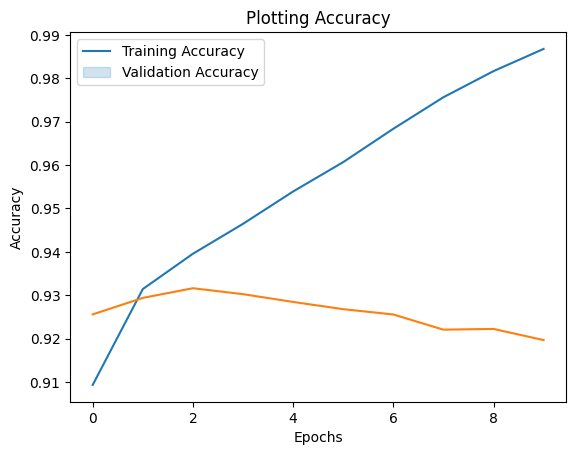

In [ ]:
# Evaluating the Model

plt.figure()
sns.lineplot(hist_lstm.history["accuracy"])
sns.lineplot(hist_lstm.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Plotting Accuracy")
plt.legend(["Training Accuracy" , "Validation Accuracy"])
plt.show()

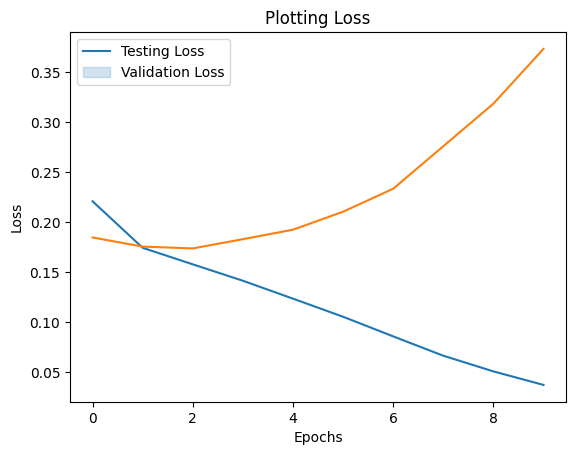

In [ ]:
plt.figure()
sns.lineplot(hist_lstm.history["loss"])
sns.lineplot(hist_lstm.history["val_loss"])
plt.legend(["Testing Loss" , "Validation Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plotting Loss")
plt.show()

In [ ]:
# Saving and Testing Model

model_lstm.save("model.h5")

def predict_sentiment(text):
    text = final_clean(text)
    text = tok.texts_to_sequences([text])
    text = pad_sequences(text, maxlen=1)
    prediction = model_lstm.predict(text)

    print("Prediction shape:", prediction.shape)
    if prediction.round() == 0:
        return "Negative"
    else:
        return "Positive"

text = input("Enter a Tweet : ")
print("The sentiment of the text is " , predict_sentiment(text))

Enter a Tweet : apples are good for health
1/1 [==============================] - 0s 18ms/step
Prediction shape: (1, 1)
The sentiment of the text is  Negative
